In [3]:
# 使用資料分析函式庫 pandas 處理 CSV 數據
import pandas as pd
from IPython.display import display

# 將事先預處理過的英雄數據讀取為 pandas 的 DataFrame 
# 你可以從同樣的 url 獲得本文 demo 的數據
# Data為147個角色基礎能力資料(依序為名稱,類型,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦)
df = pd.read_csv("https://bit.ly/2FkIaTv", sep="\t", index_col="名稱")
print("df.shape:", df.shape) # 顯示資料有147行（樣本數）和12列（特徵數）

# 展示隨機 5 rows / 顯示前 5 rows
print("五名英雄數據：")
display(df.sample(5)) # display(df.head(5))

# 顯示各特徵的平均與標準差
print("各特徵平均與標準差：")
df_stats = df.describe().loc[['mean', 'std']]
df_stats.style.format("{:.2f}  ")

df.shape: (147, 12)
五名英雄數據：


,類型,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
名稱,,,,,,,,,,,,
茂凱,坦克,125,377,0.6,43,95,565.0,5.0,335,63.5,39.0,32.1
杰西,鬥士,125,357,0.8,37,90,560.0,6.0,335,54.0,27.0,30.0
賽勒斯,法師,175,280,0.8,50,95,585.0,9.0,340,61.0,32.0,39.0
夜曲,刺客,125,275,0.5,35,85,585.0,8.5,345,62.0,38.0,32.1
飛斯,刺客,175,317,0.8,37,98,570.0,8.0,335,58.0,22.4,32.1


各特徵平均與標準差：


,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
mean,326.39,309.66,0.57,33.03,88.52,555.83,6.60,336.31,59.37,30.06,31.13
std,196.52,115.40,0.28,16.62,6.65,37.33,1.78,7.56,6.17,6.72,1.71


In [4]:
"""
將英雄數據正規化。使用對的 API 能幫我們省下不少時間。
這邊為了教學目的，同時呼叫 scikit-learn API 並手動計算比較結果
"""
from sklearn.preprocessing import StandardScaler
from numpy.testing import assert_almost_equal

# 將類型以外的 11 個特徵全取出
X = df.iloc[:, 1:]  # (n_samples, n_features)

# 使用 scikit-learn 內建的 API 正規化
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)  # 注意維度

# 手動正規化當然也能得到跟 scikit-learn API 相同的結果
# 注意我們有所有英雄數據（母體）而非抽樣，自由度 = 0
Z = (X - X.mean(axis=0)) / X.std(axis=0, ddof=0)
assert_almost_equal(Z, Z_sk)

# 更新我們的 DataFrame
df.iloc[:, 1:] = Z

# 展示前 5 rows
print("正規化後前五名英雄數據：")
display(df.head(5).style\
        .format("{:.2f}", subset=df.columns[1:]))

# 顯示各特徵的平均與標準差
print("各特徵平均與標準差：")
df_stats = df.describe().loc[['mean', 'std']]
df_stats.style.format("{:.2f}")


正規化後前五名英雄數據：


,類型,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
名稱,,,,,,,,,,,,
厄薩斯,鬥士,-0.77,-2.69,-2.02,-1.99,0.22,0.65,-2.03,1.15,0.10,1.19,0.57
阿璃,法師,1.14,0.94,0.84,-0.48,0.52,-0.80,-0.06,-0.84,-1.04,-1.37,-0.66
阿卡莉,刺客,-1.03,-0.95,-2.02,-1.99,0.98,0.52,0.79,1.15,0.49,-1.05,3.45
亞歷斯塔,坦克,-1.03,0.35,0.84,0.42,2.64,0.47,1.07,-0.84,0.28,2.08,0.57
阿姆姆,坦克,-1.03,-0.20,-0.23,0.42,-0.68,1.54,1.35,-0.17,-0.97,0.44,0.57


各特徵平均與標準差：


,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
mean,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


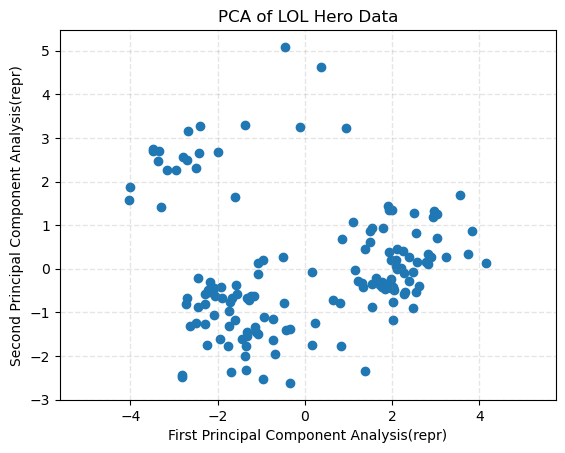

In [29]:
"""
透過 scikit-learn 將 11 維的 LOL 英雄數據降到 2 維
"""
from sklearn.decomposition import PCA

# 我們只要最大的兩個主成分。scikit-learn 會自動幫我們
# 依照 eigenvalue 的大小排序共變異數矩陣的 eigenvectors
n_components = 2
random_state = 9527

pca = PCA(n_components=n_components, 
          random_state=random_state)

# 注意我們是對正規化後的特徵 Z 做 PCA
L = pca.fit_transform(Z)  # (n_samples, n_components)

# 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸
plt.scatter(L[:, 0], L[:, 1])
# 確保圖的X軸與Y軸的比例相等
plt.axis('equal');

# 設定圖片的標題和軸標籤
plt.title('PCA of LOL Hero Data')
plt.xlabel('First Principal Component Analysis(repr)')
plt.ylabel('Second Principal Component Analysis(repr)')
# 新增網格線
plt.grid(True, color='gray', linestyle='--', linewidth=1.0, zorder=0, alpha=0.2)
# 顯示圖片
plt.show()

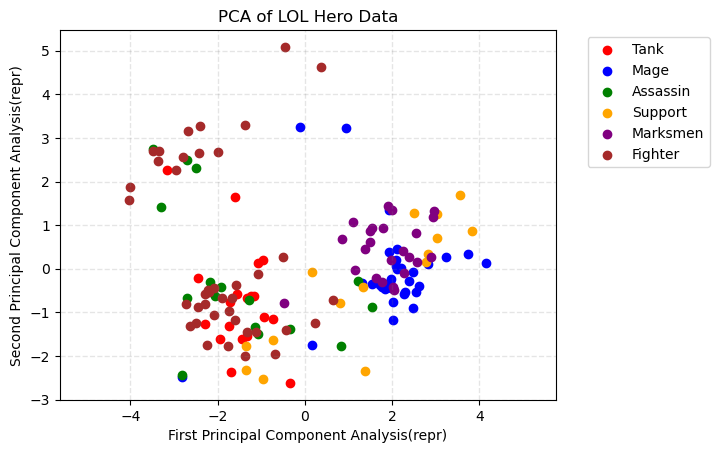

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ... （前面的程式碼保持不變）
labels = ['坦克', '法師', '刺客', '輔助', '射手', '鬥士']

# 根據類型設定不同的顏色和透明度
colors = {'坦克': {'color': 'red', 'alpha': 1.0},
          '法師': {'color': 'blue', 'alpha': 1.0},
          '刺客': {'color': 'green', 'alpha': 1.0},
          '輔助': {'color': 'orange', 'alpha': 1.0},
          '射手': {'color': 'purple', 'alpha': 1.0},
          '鬥士': {'color': 'brown', 'alpha': 1.0}}

# 透過 scikit-learn 將 11 維的 LOL 英雄數據降到 2 維
n_components = 2
random_state = 9527

pca = PCA(n_components=n_components, random_state=random_state)

# 注意我們是對正規化後的特徵 Z 做 PCA
L = pca.fit_transform(Z)  # (n_samples, n_components)

# 將投影到第一主成分的 repr. 顯示在 x 軸，第二主成分在 y 軸
# 根據類型繪製不同顏色的點
for label, settings in colors.items():
    indices = df['類型'] == label
    plt.scatter(L[indices, 0], L[indices, 1], color=settings['color'], alpha=settings['alpha'], label=label)

# 將中文類型轉換成英文類型的映射字典
type_mapping = {'坦克': 'Tank', '法師': 'Mage', '刺客': 'Assassin', '輔助': 'Support', '射手': 'Marksmen', '鬥士': 'Fighter'}

# 建立英文類型的圖例（legend）
plt.legend(labels=[type_mapping[label] for label in colors.keys()], bbox_to_anchor=(1.05, 1), loc='upper left')
# 確保圖的X軸與Y軸的比例相等
plt.axis('equal');

# 設定圖片的標題和軸標籤
plt.title('PCA of LOL Hero Data')
plt.xlabel('First Principal Component Analysis(repr)')
plt.ylabel('Second Principal Component Analysis(repr)')
# 新增網格線
plt.grid(True, color='gray', linestyle='--', linewidth=1.0, zorder=0, alpha=0.2)
# 顯示圖片
plt.show()

In [6]:
"""
解析英雄數據的前兩大主成份所代表的意涵。
顏色越突出代表其絕對值越大
"""
from IPython.display import display
import numpy as np
pcs = np.array(pca.components_) # (n_comp, n_features)

df_pc = pd.DataFrame(pcs, columns=df.columns[1:])
df_pc.index = [f"第{c}主成分" for c in['一', '二']]
df_pc_style = df_pc.style.background_gradient(cmap='bwr_r', axis=None).format("{:.2}")
display(df_pc_style)

,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
第一主成分,0.43,0.28,0.19,0.14,-0.14,-0.32,-0.31,-0.33,-0.35,-0.34,-0.34
第二主成分,0.072,-0.43,-0.56,-0.5,-0.32,-0.24,-0.21,0.014,-0.021,-0.08,-0.16


In [27]:
pca_11d = PCA(11, random_state=random_state)
pca_11d.fit(Z)
np.round(pca_11d.explained_variance_ratio_, 2)

array([0.41, 0.2 , 0.09, 0.08, 0.05, 0.05, 0.04, 0.03, 0.02, 0.02, 0.01])